<h1>Second Assignment<h1>

## Dataset

In [36]:
# importing the required libraries
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In this homework, we will use the New York City Airbnb Open Data.
The goal of this homework is to create a regression model for prediction apartment prices (column 'price').

## EDA

- Load the data.
- Look at the price variable. Does it have a long tail?


## Features

For the rest of the homework, you'll need to use only these columns:

- 'latitude',
- 'longitude',
- 'price',
- 'minimum_nights',
- 'number_of_reviews',
- 'reviews_per_month',
- 'calculated_host_listings_count',
- 'availability_365'
- Select only them.

In [37]:
# filtering out the columns to use
usecolumns = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
df = pd.read_csv('AB_NYC_2019.csv', usecols=usecolumns)
df.head(10)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129
6,40.68688,-73.95596,60,45,49,0.40,1,0
7,40.76489,-73.98493,79,2,430,3.47,1,220
8,40.80178,-73.96723,79,2,118,0.99,1,0
9,40.71344,-73.99037,150,1,160,1.33,4,188


In [38]:
df.shape

(48895, 8)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


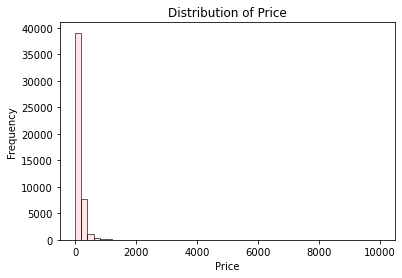

In [40]:
# checking if the price is tail
plt.figure(figsize=(6,4))
sns.histplot(df.price, bins=50, alpha=0.1, color='red')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of Price')
plt.show()


<b>Yes the price column has tail<b>

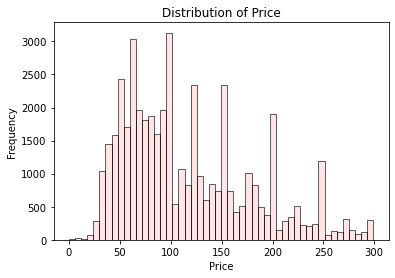

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(df.price[df.price < 300], bins=50, alpha=0.1, color='red')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of Price')
plt.show()

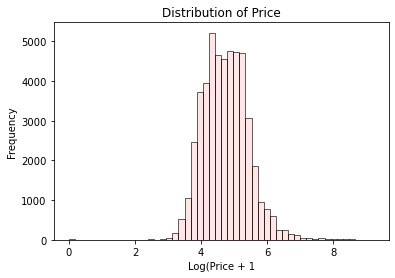

In [42]:
price_log = np.log1p(df.price)

plt.figure(figsize=(6,4))
sns.histplot(price_log, bins=50, alpha=0.1, color='red')
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1')
plt.title('Distribution of Price')
plt.show()

## Question 1

#### Find a feature with missing values. How many missing values does it have?

In [43]:
# checking columns with NAN
incomplete = df.isna().mean()*100
print(incomplete[incomplete>0])

reviews_per_month    20.558339
dtype: float64


## Question 2

#### What's the median (50% percentile) for variable 'minimum_nights'?

In [44]:
#df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T
print(df['minimum_nights'].quantile(q=0.5))

3.0


## Split the data

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('price') is not in your dataframe.
- Apply the log transformation to the price variable using the np.log1p() function.

In [45]:
# shuffling the data, using random seed 42
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [46]:
# Spiltting the data into train(60%), validation(20%),test(20%)
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - (n_val + n_test)
n_train, n_val, n_test,n

(29337, 9779, 9779, 48895)

In [47]:
# creating a copy, so as not to affect the main dataframe
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [48]:
# they still retain the same size after copy
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [49]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [50]:
#y_train = df.train.price.values
#y_val = df.val.price.values
#y_test = df.test.values


y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [51]:
del df_train['price']
del df_val['price']
del df_test['price']

In [52]:
len(df_train), len(y_train), len(y_test)

(29337, 29337, 9779)

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [56]:
# a function to calculate linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [57]:
X_features = ['latitude',
              'longitude',
              'minimum_nights',
              'number_of_reviews',
              'reviews_per_month',
              'calculated_host_listings_count',
              'availability_365']

In [58]:
# a function to fill NAN values
def fill_na(df, nan_values):
    df_new = df[X_features]
    df_new = df_new.fillna(nan_values)
    X = df_new.values
    return X

In [59]:
# function to calculate RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [62]:
#filling with the mean values
mean = df_train.reviews_per_month.mean()


X_mean_train = fill_na(df_train, nan_values=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)


X_mean_val = fill_na(df_val, nan_values=mean)
y_mean_pred_values = w_0_mean + X_mean_val.dot(w_mean) 


np.round(rmse(y_val, y_mean_pred_values),2)

0.64

In [64]:
# filling with zero
X_null_train = fill_na(df_train, nan_values=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)


X_null_val = fill_na(df_val, nan_values=0)
y_null_pred_values = w_0_null + X_null_val.dot(w_null) 


np.round(rmse(y_val, y_null_pred_values),2)

0.64

## Question 4

In [65]:
# regularisation
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [66]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 -419.91265634211527 0.64
1e-06 -419.8627137442641 0.64
0.0001 -414.9764904540489 0.64
0.001 -375.27365092432433 0.64
0.01 -191.7838400681959 0.66
0.1 -32.56256053166027 0.68
1 -3.4992168346560604 0.68
5 -0.7033623159994327 0.68
10 -0.35127676025052085 0.68


## Question 5

In [67]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.price.values
    y_val_orig = df_val.price.values
    y_test_orig = df_test.price.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_null_train = fill_na(df_train, nan_values=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = fill_na(df_val, nan_values=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -427.6284479356067 0.65
1 -414.7055506698023 0.65
2 -423.2541340749045 0.65
3 -421.89331661241675 0.64
4 -422.06099276492336 0.64
5 -429.17875392305484 0.63
6 -427.49189678268385 0.63
7 -428.18847117812334 0.65
8 -427.6929097657135 0.65
9 -426.9826859888915 0.64


In [68]:
rmse_list

[0.65, 0.65, 0.65, 0.64, 0.64, 0.63, 0.63, 0.65, 0.65, 0.64]

In [69]:
np.round(np.std(rmse_list),3)

0.008

## Question 6

In [72]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


# combining the train and valiadation df
frames = [df_train, df_val]
df_train_val = pd.concat(frames)


df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train_val_orig = df_train_val.price.values
y_test_orig = df_test.price.values


y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)


del df_train_val['price']
del df_test['price']

In [73]:
X_null_train_val = fill_na(df_train_val, nan_values=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = fill_na(df_test, nan_values=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.65

There is a differnce in 1% change in the use of regularization